<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/Optim_Mined_Data/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# KNN

In [3]:
import numpy as np
import pandas as pd
import timeit
from sklearn.model_selection import train_test_split
%alias_magic t timeit

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [20]:
data = pd.read_csv('/content/drive/MyDrive/ML/in-halo.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,particle_id,in-halo,den_contrast for 12.4,den_contrast for 13.0,den_contrast for 13.6
0,2130472,0.0,-0.049770,-0.044199,-0.037908
1,2130544,0.0,-0.052879,-0.045431,-0.038645
2,2130870,0.0,-0.054059,-0.046234,-0.039032
3,2130914,0.0,-0.053996,-0.046234,-0.039032
4,2130929,0.0,-0.052927,-0.046220,-0.039032


In [21]:
data = data.sort_values( by =['den_contrast for 12.4'])
X, Y = data.iloc[:,2:], data['in-halo']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 75000    X_test : 25000


In [22]:
X_test,X_train = np.array(X_test),np.array(X_train)
Y_test,Y_train = np.array(Y_test),np.array(Y_train)
X ,Y= np.array(X),np.array(Y)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights='uniform', 
                                  algorithm='auto', leaf_size = 30, p = 2, metric='minkowski', metric_params = None)
#check
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
#check
%t Y_predict_knn = classifier.predict(X_test)

10 loops, best of 5: 57.3 ms per loop
1 loop, best of 5: 816 ms per loop


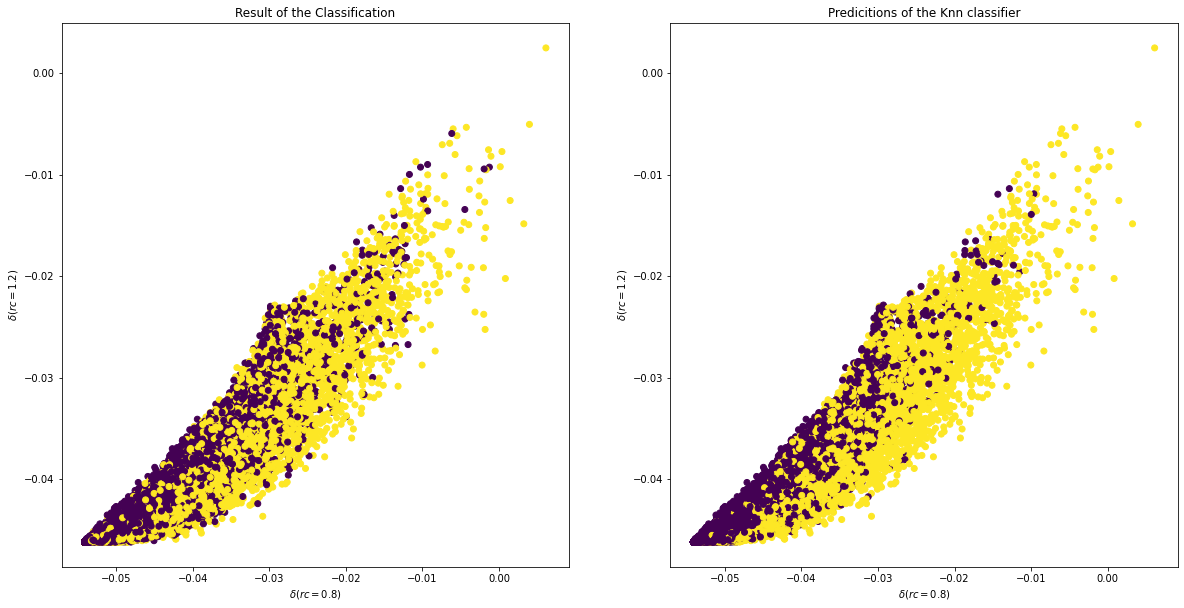

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

ax.scatter(*X_test[:,:2].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Knn classifier')
plt.scatter(*X_test[:,:2].T, c = Y_predict_knn)
plt.show()


plt.show()

In [25]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73     15943
         1.0       0.52      0.47      0.49      9057

    accuracy                           0.65     25000
   macro avg       0.62      0.61      0.61     25000
weighted avg       0.64      0.65      0.64     25000



Validation Curve

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


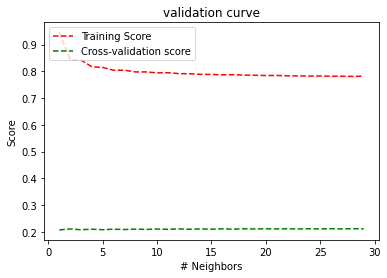

In [26]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1,30, 1)
print(param_range)

train_scores, test_scores = validation_curve(
classifier, X=X, y=Y,cv=5, param_name="n_neighbors", param_range=param_range,
scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('# Neighbors')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

Optimal value of $n_{neighbor}$ = 28

Run-Time vs. leaf-size


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


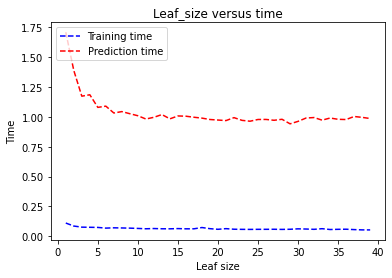

In [27]:
import time

leaf_range = np.arange(1,40,1)

t_time = np.array([])
p_time = np.array([])

for i in leaf_range:
    print(i)
    classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=i, p=2, metric='minkowski')
    
    start = time.time()
    classifier.fit(X_train, Y_train)
    stop = time.time()
    t1 = stop - start
    t_time = np.append(t_time , t1)
    
    start = time.time()
    n = classifier.predict(X_test)
    stop = time.time()
    t2 = stop - start
    p_time = np.append(p_time , t2)
    
plt.plot(leaf_range , t_time , 'b--' , label = 'Training time')
plt.plot(leaf_range , p_time , 'r--' , label = 'Prediction time')
plt.title('Leaf_size versus time')
plt.xlabel('Leaf size')
plt.ylabel('Time')
plt.legend(loc='upper left')
plt.show()

Learning Curve

In [28]:
from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,8000,500)

print('learning started')
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

learning started
Training scores:

       0         1         2         3         4
0   1.0  0.891000  0.891000  0.891000  0.891000
1   1.0  0.920667  0.920667  0.920667  0.920667
2   1.0  0.932000  0.932000  0.932000  0.932000
3   1.0  0.927600  0.927600  0.927600  0.927600
4   1.0  0.926667  0.926667  0.926667  0.926667
5   1.0  0.925714  0.925714  0.925714  0.925714
6   1.0  0.926250  0.926250  0.926250  0.926250
7   1.0  0.921556  0.921556  0.921556  0.921556
8   1.0  0.916000  0.916000  0.916000  0.916000
9   1.0  0.914000  0.914000  0.914000  0.914000
10  1.0  0.913667  0.913667  0.913667  0.913667
11  1.0  0.913692  0.913692  0.913692  0.913692
12  1.0  0.910857  0.910857  0.910857  0.910857
13  1.0  0.908667  0.908667  0.908667  0.908667

Validation scores:

           0        1        2       3       4
0   0.63695  0.63695  0.63695  0.6369  0.6369
1   0.63695  0.63695  0.63695  0.6369  0.6369
2   0.63695  0.63695  0.63695  0.6369  0.6369
3   0.63695  0.63695  0.63695  0.6369 

Fine Tuning The Model

In [29]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, train_size = 2500 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

2500
97500
100000


In [30]:
classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=30 , p=2, metric='minkowski')
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
%t Y_predict_knn = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_knn[Y_predict_knn == 1]))

The slowest run took 5.11 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 1.45 ms per loop
1 loop, best of 5: 3.22 s per loop
97500
23344


In [31]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.72      0.86      0.79     62130
         1.0       0.63      0.42      0.50     35370

    accuracy                           0.70     97500
   macro avg       0.68      0.64      0.64     97500
weighted avg       0.69      0.70      0.68     97500



Metrics

In [32]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_knn)
print('Here is the confusion matrix for the Knn classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')

Here is the confusion matrix for the Knn classifier: 

TP = 53528   FP = 8602 

FN = 20628   TN = 14742 



Confusion matrix, without normalization
[[53528  8602]
 [20628 14742]]
Normalized confusion matrix
[[0.86154837 0.13845163]
 [0.58320611 0.41679389]]


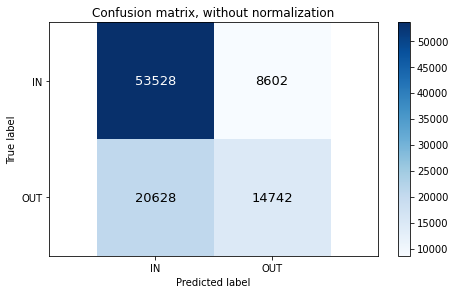

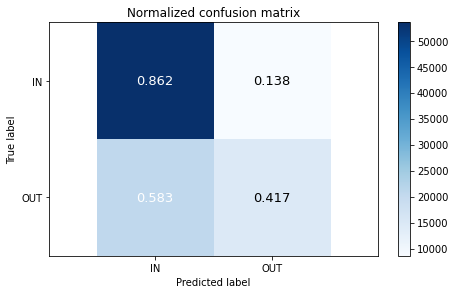

In [33]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Acurracy

In [34]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 70.021%


Recall

In [35]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_knn, pos_label=0)
precision = precision_score(Y_test, Y_predict_knn, pos_label = 0)
print(f"The recall for the Knn classifier: \n {round(recall,3)}"  )
print(f"The precision for Knn classifier: \n {round(precision,3)}"  )

The recall for the Knn classifier: 
 0.862
The precision for Knn classifier: 
 0.722


Precision - Recall curve

[[0.9  0.1 ]
 [0.85 0.15]
 [0.7  0.3 ]
 ...
 [0.7  0.3 ]
 [0.55 0.45]
 [0.35 0.65]]
[0. 0. 0. ... 0. 0. 1.]


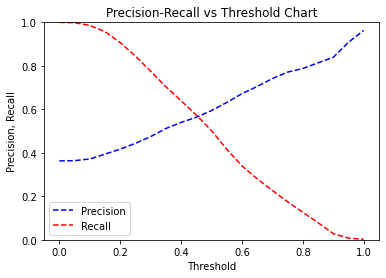

In [36]:
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict_knn)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

Bias & Variance

In [37]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [38]:
from mlxtend.evaluate import bias_variance_decomp

In [39]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(classifier ,X_train, Y_train, X_test, Y_test, loss='mse', num_rounds=200, random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.310
Average bias: 0.241
Average variance: 0.070
